# Introduction to Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We want to know if there any correlation between money we spend on advertisting (for TV channel, radio channel, newspaper channel) and the results of sales.

###  Is there a relationship between total advertising spend and sales?
As we will be doing Simple Linear Regression, we only limited to single feature. So we will combine those 3 features into single one.

In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


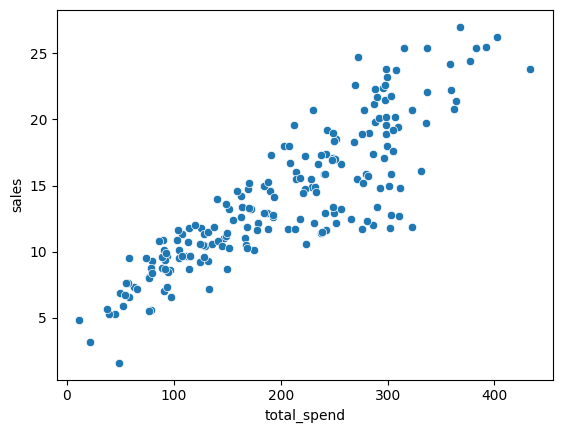

In [6]:
sns.scatterplot(data=df, x='total_spend', y='sales');

### Least Squares Line
    regplot shows Best Fit Line
    by using best fit line, we can predict values. Example: if we spend 400$, we expect to sell around 24.
    so basically we want to find how to create this Best Fit Line

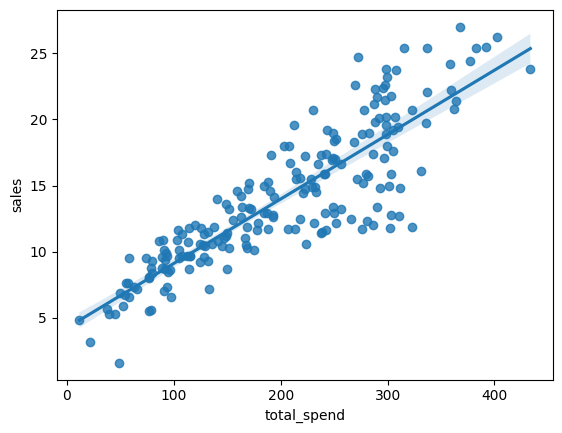

In [7]:
sns.regplot(data=df, x='total_spend', y='sales');

We will try to find this Best Fit Line by using python.

In [8]:
X = df['total_spend']
y = df['sales']

y = mx+b

y = B1x+B0

In [9]:
np.polyfit(X, y, deg=1) # we set degree 1 as we are not interested in square, cube, etc.

# the return values are B1, B0 coffient values

array([0.04868788, 4.24302822])

As we now get those B1, B0 coffient values, we can predict value Y values based on X.

In [10]:
# we will create made up Potential Future Spend Budgets (from 0 to 500$ with 100 values)
potential_spend = np.linspace(0, 500, 100)

In [11]:
# calculate the predicated sales by using y = B1x+B0 formula

predicted_sales = 0.04868788 * potential_spend + 4.24302822

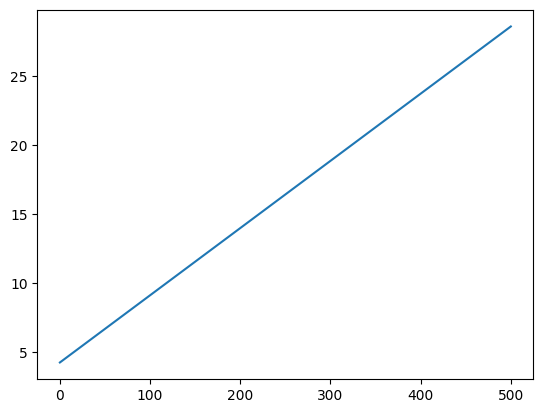

In [12]:
# now we get the best fit line for the range of 0 to 500
plt.plot(potential_spend, predicted_sales)

As we got the best fit line, we will try to combine with the acutal spend and sales data.

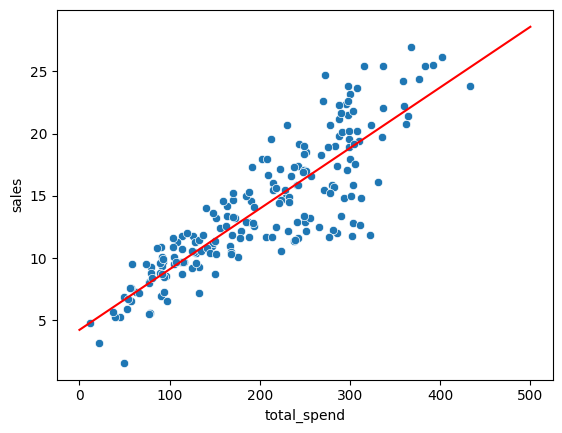

In [13]:
# to visualize together with values, we will combine
sns.scatterplot(data=df, x='total_spend', y='sales');
plt.plot(potential_spend, predicted_sales, color='red');

### Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?

In [14]:
spend = 200

predicted_sales = 0.04868788 * spend + 4.24302822

In [15]:
predicted_sales

13.98060422

so if we spend $200, we expect to have sale of around 14. Check against the chart and it makes sense.

## Further considerations...
But how do we know the line prediction is really good?

## Overfitting, Underfitting, and Measuring Performance
We already use order=1 to fit the line and we will explore different orders to see whether they fit better or not.